# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

# Importing the data

In [2]:
sms = pd.read_csv('spam.csv', encoding='ISO-8859-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Dropping the unwanted columns and renaming the remaining columns**

In [3]:
cols_to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
sms.drop(cols_to_drop,axis=1,inplace=True)
sms.columns = ['label','message']

In [4]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
sms.shape

(5572, 2)

**Converting words into vectors and splitting data into train/test**

In [26]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(sms['message'])

X_train, X_test, y_train, y_test = train_test_split(X, sms['label'], test_size=0.2, random_state=69)

In [27]:
sms['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [28]:
len(cv.get_feature_names())

8672

In [29]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
print(cv.get_stop_words())

None


**Creating Multinomial Naive Bayes model for Spam detection.**

In [31]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print('training accuracy is --> ',mnb.score(X_train,y_train)*100)
print('test accuracy is --> ',mnb.score(X_test,y_test)*100)

training accuracy is -->  99.55126766883554
test accuracy is -->  97.48878923766816


# Visualising the results

In [32]:
def visualise(label):
    words = ''
    for msg in sms[sms['label']==label]['message']:
        msg  = msg.lower()
        words += msg + ''
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

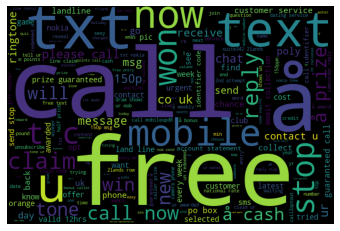

In [33]:
visualise('spam')

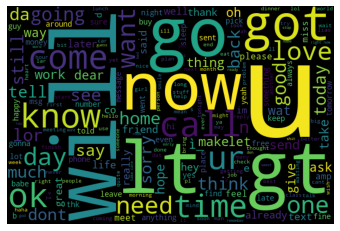

In [34]:
visualise('ham')

**Live Prediction**

In [40]:
def check_spam(msg):
    msg = cv.transform([msg])
    predict = mnb.predict(msg)
    print(f"This is a {predict[0]} message")

In [41]:
msg1 = "I need some time."
check_spam(msg1)

This is a ham message


In [42]:
msg2 = "You are the lucky winner for the lottery price of $6million."
check_spam(msg2)

This is a spam message
